In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Splitting the test and train dataset

from sklearn.model_selection import train_test_split

#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

# for pre processing

from sklearn import preprocessing

In [2]:
df=pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#Checking the datatypes and null values in the dataset

In [3]:
df.shape    # Checking the number of rows and columns

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#Summary statistics

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#Exploratory data analysis

In [9]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<Axes: >

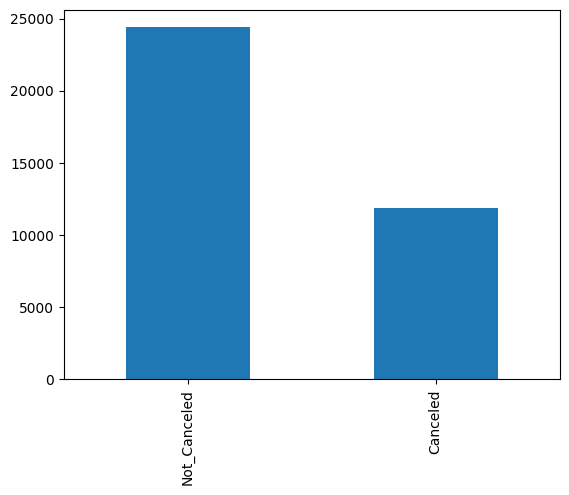

In [10]:
df.booking_status.value_counts().plot(kind='bar')

In [11]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [12]:
df[['repeated_guest','booking_status']].groupby(['booking_status']).value_counts().to_frame().reset_index()

,booking_status,repeated_guest,0
0,Canceled,0,11869
1,Canceled,1,16
2,Not_Canceled,0,23476
3,Not_Canceled,1,914


<Axes: xlabel='booking_status', ylabel='count'>

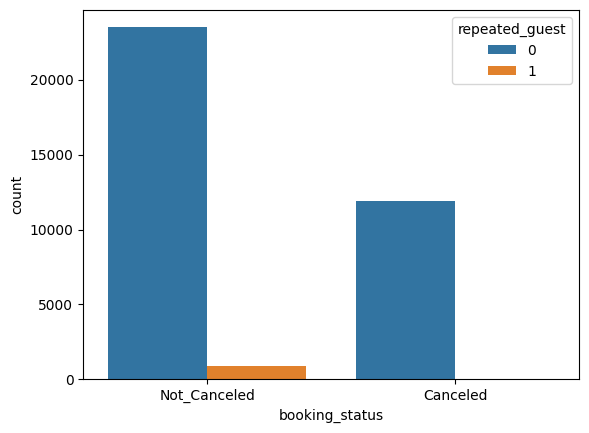

In [13]:
sns.countplot(data=df,x='booking_status',hue='repeated_guest')

.The countplot shows that repeated guests did not cancel the bookings.

In [14]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
df.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

<Axes: xlabel='booking_status'>

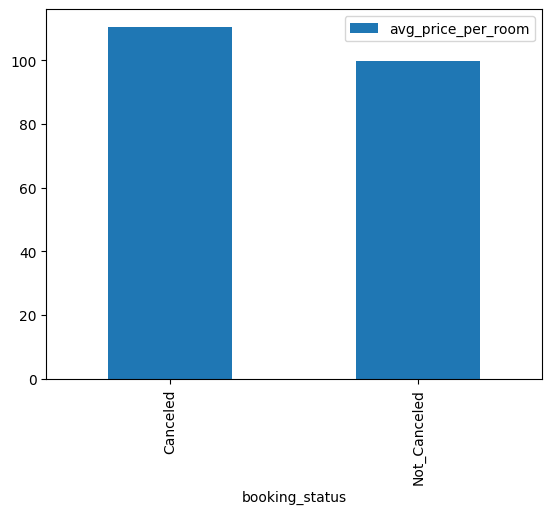

In [16]:
df[['avg_price_per_room','booking_status']].groupby(['booking_status']).mean().plot(kind='bar')

In [17]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [18]:
df.shape

(36275, 19)

**Dropping the Booking_ID column**

In [19]:
df.drop('Booking_ID',axis=1,inplace=True)

#Converting the categorical values into numerial values using label_encoder

In [20]:
label_encoder=preprocessing.LabelEncoder()
df['type_of_meal_plan']=label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved']=label_encoder.fit_transform(df['room_type_reserved'])
df['booking_status']=label_encoder.fit_transform(df['booking_status'])
df['market_segment_type']=label_encoder.fit_transform(df['market_segment_type'])

In [21]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# seperating the x(independent) and y (target) variables

In [22]:
x=df.iloc[:,0:17]

In [23]:
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0


In [24]:
y=df.iloc[:,17]

In [25]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

# Splitting the data into 70% training and 30% testing data

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25392, 17), (10883, 17), (25392,), (10883,))

In [28]:
x_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30392,1,0,1,0,3,0,0,53,2018,9,11,4,0,0,0,94.32,0
6685,2,0,1,2,0,0,0,63,2018,4,22,4,0,0,0,105.30,1
8369,2,0,2,3,0,0,3,55,2018,9,11,4,0,0,0,106.24,0
2055,2,0,0,2,3,0,0,53,2017,12,29,4,0,0,0,81.00,1
10969,1,0,2,4,0,0,0,245,2018,7,6,3,0,0,0,110.00,0


In [29]:
y_test.head()

30392    1
6685     0
8369     1
2055     1
10969    0
Name: booking_status, dtype: int64

#Building a Decision Tree model using gini index

In [30]:
#Building Decision Tree model

model=DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

[Text(0.5872231012658228, 0.9375, 'x[7] <= 151.5\ngini = 0.442\nsamples = 25392\nvalue = [8363, 17029]'),
 Text(0.3192246835443038, 0.8125, 'x[16] <= 0.5\ngini = 0.357\nsamples = 20410\nvalue = [4749, 15661]'),
 Text(0.15981012658227847, 0.6875, 'x[11] <= 3.5\ngini = 0.444\nsamples = 10667\nvalue = [3549, 7118]'),
 Text(0.07753164556962025, 0.5625, 'x[7] <= 90.5\ngini = 0.248\nsamples = 5395\nvalue = [781, 4614]'),
 Text(0.04113924050632911, 0.4375, 'x[15] <= 201.5\ngini = 0.157\nsamples = 4149\nvalue = [357, 3792]'),
 Text(0.02531645569620253, 0.3125, 'x[2] <= 0.5\ngini = 0.151\nsamples = 4130\nvalue = [340, 3790]'),
 Text(0.012658227848101266, 0.1875, 'x[11] <= 2.5\ngini = 0.069\nsamples = 2416\nvalue = [87, 2329]'),
 Text(0.006329113924050633, 0.0625, 'gini = 0.192\nsamples = 807\nvalue = [87, 720]'),
 Text(0.0189873417721519, 0.0625, 'gini = 0.0\nsamples = 1609\nvalue = [0, 1609]'),
 Text(0.0379746835443038, 0.1875, 'x[7] <= 68.5\ngini = 0.252\nsamples = 1714\nvalue = [253, 1461]')

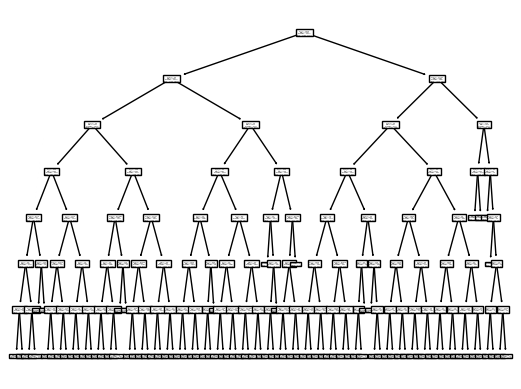

In [31]:
# Plot the tree
tree.plot_tree(model)

In [32]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

[Text(0.5872231012658228, 0.9375, 'lead_time <= 151.5\ngini = 0.442\nsamples = 25392\nvalue = [8363, 17029]\nclass = Not_canceled'),
 Text(0.3192246835443038, 0.8125, 'no_of_special_requests <= 0.5\ngini = 0.357\nsamples = 20410\nvalue = [4749, 15661]\nclass = Not_canceled'),
 Text(0.15981012658227847, 0.6875, 'market_segment_type <= 3.5\ngini = 0.444\nsamples = 10667\nvalue = [3549, 7118]\nclass = Not_canceled'),
 Text(0.07753164556962025, 0.5625, 'lead_time <= 90.5\ngini = 0.248\nsamples = 5395\nvalue = [781, 4614]\nclass = Not_canceled'),
 Text(0.04113924050632911, 0.4375, 'avg_price_per_room <= 201.5\ngini = 0.157\nsamples = 4149\nvalue = [357, 3792]\nclass = Not_canceled'),
 Text(0.02531645569620253, 0.3125, 'no_of_weekend_nights <= 0.5\ngini = 0.151\nsamples = 4130\nvalue = [340, 3790]\nclass = Not_canceled'),
 Text(0.012658227848101266, 0.1875, 'market_segment_type <= 2.5\ngini = 0.069\nsamples = 2416\nvalue = [87, 2329]\nclass = Not_canceled'),
 Text(0.006329113924050633, 0.062

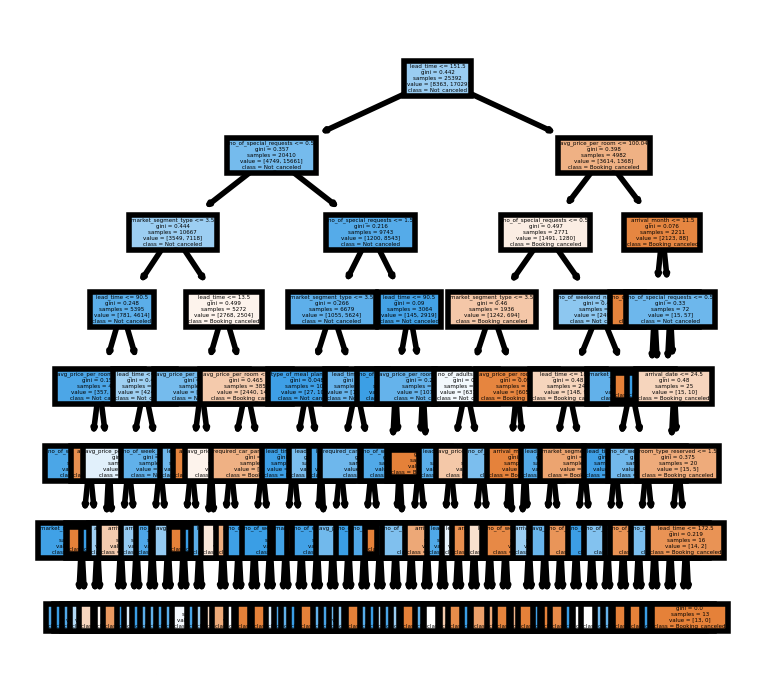

In [33]:
fn=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'type_of_meal_plan','required_car_parking_space',
    'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
    'arrival_date', 'market_segment_type', 'repeated_guest','no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']

cn=['Booking_canceled','Not_canceled']

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=400)

tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)


#Checking model accuracy on training data

In [39]:
preds_train=model.predict(x_train)
pd.Series(preds_train).value_counts()

1    17957
0     7435
dtype: int64

In [40]:
preds_train

array([0, 1, 1, ..., 0, 1, 0])

In [41]:
y_train

13662    0
26641    1
17835    1
21485    0
5670     0
        ..
7813     0
32511    0
5192     0
12172    1
33003    0
Name: booking_status, Length: 25392, dtype: int64

In [42]:
pd.crosstab(y_train,preds_train)

col_0,0,1
booking_status,,
0,6042,2321
1,1393,15636


In [43]:
np.mean(preds_train==y_train)

0.8537334593572778

#Checking model accuracy on testing data

In [34]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    7795
0    3088
dtype: int64

In [35]:
preds

array([0, 1, 0, ..., 1, 0, 0])

In [36]:
y_test

30392    1
6685     0
8369     1
2055     1
10969    0
        ..
12013    1
4840     1
34313    1
27390    0
9399     0
Name: booking_status, Length: 10883, dtype: int64

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1
booking_status,,
0,2497,1025
1,591,6770


In [38]:
np.mean(preds==y_test)

0.851511531746761

**Summary**

.To improve the accuracy of the model, gini index is used instead of entropy

.We can observe that the accuracy of both training and test data is same.